## Попробуем рассмотреть последовательность объектов

### Создадим ДатаФрейм, в котором к признакам текущего объекта, будут добавлены признаки предыдущего объекта, если, конечно, они идут подряд, и данные имеются(предыдущий объект не тестовый). Возможно получится найти какую-то связь с помощью предыдущих признаков.

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost
from sklearn import model_selection


In [2]:
data_train = pd.read_csv('train.csv') # Загружаем датасет

In [3]:
target = data_train['target']

In [4]:
data_test = pd.read_csv('test.csv') # Загружаем датасет тестовый

In [5]:
data_test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [6]:
# Заполним таргет пропусками в тестовых данных
data_test['target'] = None

In [7]:
data_train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


***Склеим их по id***

In [8]:
# Меняем индексы в датафреймах на id объектов таблицы
data_test.index=data_test['id'].tolist()
data_train.index=data_train['id'].tolist()

In [9]:
data_test.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,None
2,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,None
6,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,None


In [10]:
data_train.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
1,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [11]:
# Добавим один Датафрейм в конец другого
data = data_train.append(data_test)

In [12]:
# Отсортируем по id
data = data.sort_values(by = ['id'])
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,NaN
1,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
2,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,NaN
3,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [13]:
target = data['target']

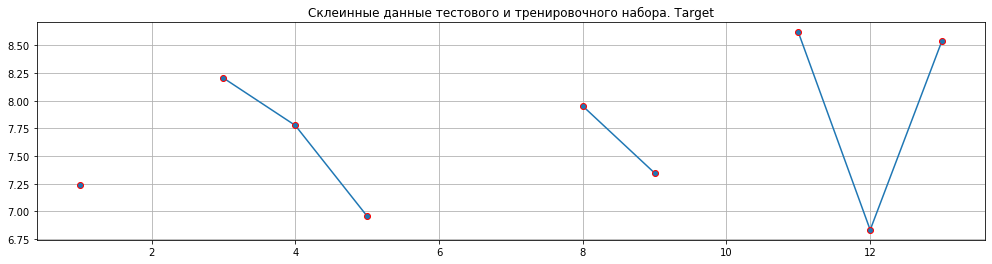

In [14]:
plt.figure(figsize=(17,4))
plt.plot(range(len(target[0:15])), target[0:15], marker ='o', markeredgecolor = 'red')
plt.title('Склеинные данные тестового и тренировочного набора. Target')
plt.grid()

## Создадим новый датафрейм, куда включим только объекты, где перед ними есть ещё один заполненный элемент Таргет. И объединим предыдущую строку с действующей по признакам. 

***Сделаем набор фич под предыдущий объект для предсказания текущего***

In [15]:
columns = data.columns.tolist()
columns_p = [column+'_p' for column in columns]
print (columns_p)

['id_p', 'cont1_p', 'cont2_p', 'cont3_p', 'cont4_p', 'cont5_p', 'cont6_p', 'cont7_p', 'cont8_p', 'cont9_p', 'cont10_p', 'cont11_p', 'cont12_p', 'cont13_p', 'cont14_p', 'target_p']


***Создаём новый тренировочный датафрейм***

In [16]:
import math
data_P = pd.DataFrame(columns = columns + columns_p)

In [17]:
%%time
index = 0    # индекс строки. Нужен для заполнения data_P из элементов data_new
jump = False # флаг для перепрыгивания итерации цикла по исходному ДФ. (Если id0Target!=NaN, id1Target!=NaN, id2Target!=NaN)
for i in range(len(data)):
    if jump == True:  # если есть флаг скачка
        jump = False  # пропускаем итерацию и сбрасываем флаг
        continue
    elif i > 1:
        # Если таргеты текущего и предыдущего объектов не NAN:
        if math.isnan(data['target'][i]) + math.isnan(data['target'][i-1]) == False: 
            # Если два объекта идут подряд по логике задачи (по их id)
            if data['id'][i] - data['id'][i-1] == 1.: 
                data_P.loc[index] = data.loc[i]            # Добавляем признаки текущего объекта
                data_P.loc[index, 'id_p':'target_p'] = data.loc[i-1].tolist()  # Добавляем признаки предыдущего объекта
                jump = True   # перепрыгиваем след. итерацию, чтобы не использовались уже имеющиеся знания в признаках
                index += 1    # увеличиваем индекс строки для заполнения нового ДФ data_P
print ('Размерность нового Датафрейма data_PP', data_P.shape)
data_P.head()

Размерность нового Датафрейма data_PP (112508, 32)
Wall time: 14min 36s


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cont6_p,cont7_p,cont8_p,cont9_p,cont10_p,cont11_p,cont12_p,cont13_p,cont14_p,target_p
0,4.0,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,...,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
1,9.0,0.352623,0.258867,0.327373,0.802627,0.284219,0.296886,0.209743,0.273710,0.308018,...,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
2,12.0,0.481610,0.805446,0.235836,0.365011,0.734725,0.404825,0.465061,0.578794,0.418807,...,0.378247,0.432821,0.562059,0.290965,0.316543,0.219192,0.326977,0.458653,0.244300,8.616237
3,23.0,0.976736,0.421698,0.193220,0.601469,0.409846,0.957475,0.728944,0.771409,0.899667,...,0.635469,0.500578,0.391758,0.490581,0.169720,0.354550,0.318670,0.397964,0.664375,8.486519
4,25.0,0.628855,0.356690,0.621465,0.226366,0.280097,0.638270,0.557355,0.351446,0.420060,...,0.919595,0.555316,0.850897,0.863949,0.832556,0.762776,0.956855,0.931999,0.709446,7.247553


In [18]:
# Сохраним полученный ДФ
data_P.to_csv('data_P.csv', index=False)

In [19]:
# Прочитаем полученный ДФ
data_train = pd.read_csv('data_P.csv')

***Посмотрим на получившийся ДФ***

In [20]:
data_train.head(7)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cont6_p,cont7_p,cont8_p,cont9_p,cont10_p,cont11_p,cont12_p,cont13_p,cont14_p,target_p
0,4.0,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,...,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
1,9.0,0.352623,0.258867,0.327373,0.802627,0.284219,0.296886,0.209743,0.273710,0.308018,...,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
2,12.0,0.481610,0.805446,0.235836,0.365011,0.734725,0.404825,0.465061,0.578794,0.418807,...,0.378247,0.432821,0.562059,0.290965,0.316543,0.219192,0.326977,0.458653,0.244300,8.616237
3,23.0,0.976736,0.421698,0.193220,0.601469,0.409846,0.957475,0.728944,0.771409,0.899667,...,0.635469,0.500578,0.391758,0.490581,0.169720,0.354550,0.318670,0.397964,0.664375,8.486519
4,25.0,0.628855,0.356690,0.621465,0.226366,0.280097,0.638270,0.557355,0.351446,0.420060,...,0.919595,0.555316,0.850897,0.863949,0.832556,0.762776,0.956855,0.931999,0.709446,7.247553
5,27.0,0.467384,0.421255,0.602419,0.535345,0.303028,0.330617,0.301785,0.264396,0.367433,...,0.905678,0.530321,0.661279,0.456205,0.531907,0.246512,0.702193,0.612390,0.707135,9.610521
6,33.0,0.290006,0.356500,0.672017,0.241037,0.282597,0.201003,0.310845,0.258725,0.175283,...,0.474892,0.958419,0.483846,0.385524,0.366986,0.708004,0.548550,0.210310,0.791862,8.084172


In [21]:
print ('Корреляция с Target текущего объекта \n', data_train.corrwith(data_train['target']))

Корреляция с Target текущего объекта 
 id          0.002842
cont1      -0.034267
cont2       0.066084
cont3       0.060876
cont4       0.001868
cont5      -0.002391
cont6       0.026660
cont7       0.064657
cont8       0.011233
cont9      -0.011943
cont10     -0.021701
cont11      0.050535
cont12      0.048522
cont13     -0.007950
cont14     -0.005554
target      1.000000
id_p        0.002842
cont1_p    -0.000840
cont2_p     0.003537
cont3_p    -0.002233
cont4_p    -0.001725
cont5_p    -0.000302
cont6_p    -0.003985
cont7_p    -0.005426
cont8_p     0.000609
cont9_p    -0.002722
cont10_p   -0.002723
cont11_p   -0.004985
cont12_p   -0.004276
cont13_p   -0.003619
cont14_p    0.000697
target_p   -0.000309
dtype: float64


***Попробуем обучить модель RF предсказывать Target***

In [22]:
features = [feature for feature in data_train.columns if feature not in ['id', 'id_p', 'target']]

In [23]:
# Делаем выделяем признаки и целевой признак
y_train = np.array(data_train['target'])
X_train = np.array(data_train[features])

In [24]:
%%time
scoring = []
estimator = xgboost.XGBRegressor(booster='gbtree', subsample=0.6, learning_rate=1, num_boost_round=1, colsample_bynode=0.6,
                             num_parallel_tree=150, max_depth=5, tree_method='gpu_hist', verbosity = 0) 
score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                     scoring = 'neg_mean_squared_error', cv = 3)
scoring.append((np.sqrt(-score)).mean())   # добавляем средние очки в список

Wall time: 9min 39s


In [25]:
print('RMSE:', scoring)

RMSE: [0.7066636566149421]


***Совсем не впечатляюще...***

### Попробуем Grad Boosting

In [26]:
from matplotlib import pylab

In [27]:
min_lr = 0.01
step_lr = 0.005
max_lr = 0.05
lrates = np.arange(min_lr, max_lr, step_lr)
lrates = np.round(lrates , 3)

In [28]:
%%time
scoring = []
for lrate in lrates:
    estimator = xgboost.XGBRegressor(objective = 'reg:squarederror', learning_rate = lrate,
                                 tree_method = 'gpu_hist', gpu_id = 0)
    score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                         scoring = 'neg_mean_squared_error', cv = 3)
    scoring.append((np.sqrt(-score)).mean())   # добавляем средние очки в список

Wall time: 23.2 s


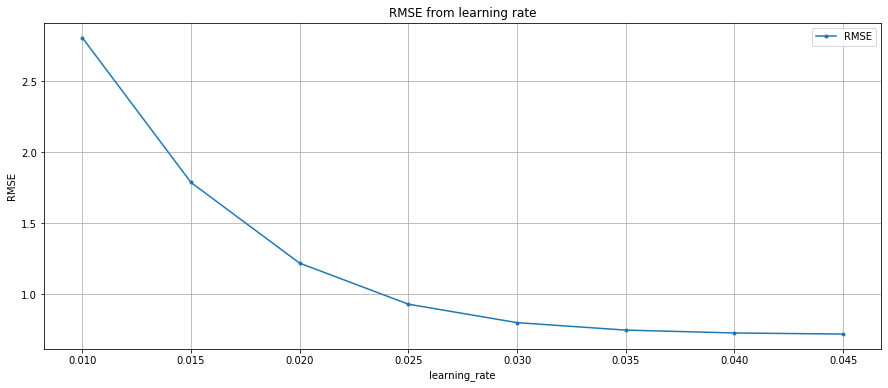

In [29]:
pylab.plot(lrates, scoring, marker='.', label='RMSE')
fig = plt.gcf()
fig.set_size_inches(15, 6, forward=True)
pylab.grid(True)
pylab.xlabel('learning_rate')
pylab.ylabel('RMSE')
pylab.title('RMSE from learning rate')
pylab.legend(loc='best')

In [39]:
estimator = xgboost.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.01, alpha = 0.045, reg_lambda = 0.01,
                                 tree_method = 'gpu_hist', gpu_id = 0, n_estimators = 400, max_depth = 7, verbosity = 0)
score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                     scoring = 'neg_mean_squared_error', cv = 3)
scoring.append((np.sqrt(-score)).mean())   

In [40]:
print('Grad_boost_scores', scoring)

Grad_boost_scores [0.7201348821673473, 0.7201348821673473]


### Попробуем линейные модели

In [41]:
from sklearn import linear_model

In [42]:
linear_regressor = linear_model.Ridge()

In [43]:
linear_scoring = model_selection.cross_val_score(linear_regressor, X_train, y_train, 
                                         scoring = 'neg_mean_squared_error', cv = 5)
linear_rmse_scores = np.sqrt(-linear_scoring)
print('linear_rmse_scores', linear_rmse_scores)
print('linear_mean_scores', linear_rmse_scores.mean())

linear_rmse_scores [0.72813496 0.724116   0.72580171 0.72276298 0.72550884]
linear_mean_scores 0.7252648963225389


***Никаких результатов вышепроделанные трюки не дали...***